# Analyzing Google Search Trends: Public Interest in ChatGPT Over the Past Year

This project explores how public interest in ChatGPT has changed over the past 12 months using data from Google Trends. By visualizing the search popularity over time and across different regions, we identify when and where ChatGPT gained the most attention. The analysis helps understand its rising influence in the tech world and how its popularity evolved globally.

Import necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pytrends.request import TrendReq
import plotly.express as px

Setup Trends Request

In [2]:
search_term = "ChatGPT"

pytrends = TrendReq(hl = "en-US", tz = 360)

pytrends.build_payload(kw_list=[search_term],timeframe="today 12-m")

Search Interest Over Time

c:\Users\Abdul\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


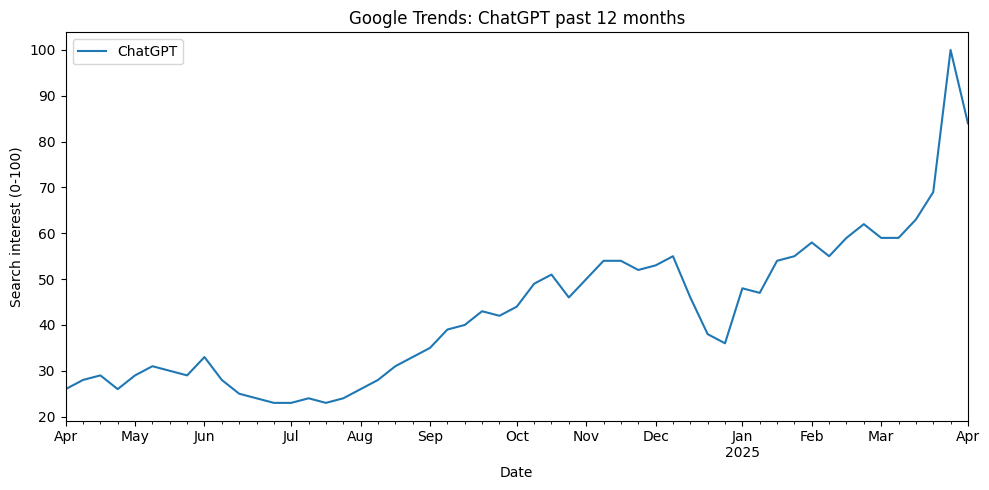

In [3]:
iot_df = pytrends.interest_over_time().drop(columns="isPartial")


iot_df.plot(figsize=(10,5))
plt.title(f"Google Trends: ChatGPT past 12 months")
plt.xlabel("Date")
plt.ylabel("Search interest (0-100)")
plt.tight_layout()
plt.show()

Search Interest By Region

In [4]:
ibr_df = pytrends.interest_by_region()
ibr_df = ibr_df.sort_values(search_term,ascending=False)

ibr_df = ibr_df.reset_index()
fig = px.choropleth(ibr_df,
                    locations='geoName',
                    locationmode='country names',
                    color='ChatGPT',
                    hover_name='geoName',
                    color_continuous_scale=px.colors.sequential.Plasma
                    )

fig.update_layout(title_text='Interest by Region', title_x=0.5)
fig.show()


Top 10 search interest by Region

In [5]:
top_10_ibr_df = ibr_df.head(10)
print(top_10_ibr_df)

       geoName  ChatGPT
0    Sri Lanka      100
1        China       86
2  Philippines       81
3        Nepal       76
4        Kenya       73
5      Ecuador       73
6       Panama       67
7     Pakistan       66
8     Ethiopia       64
9      Tunisia       62


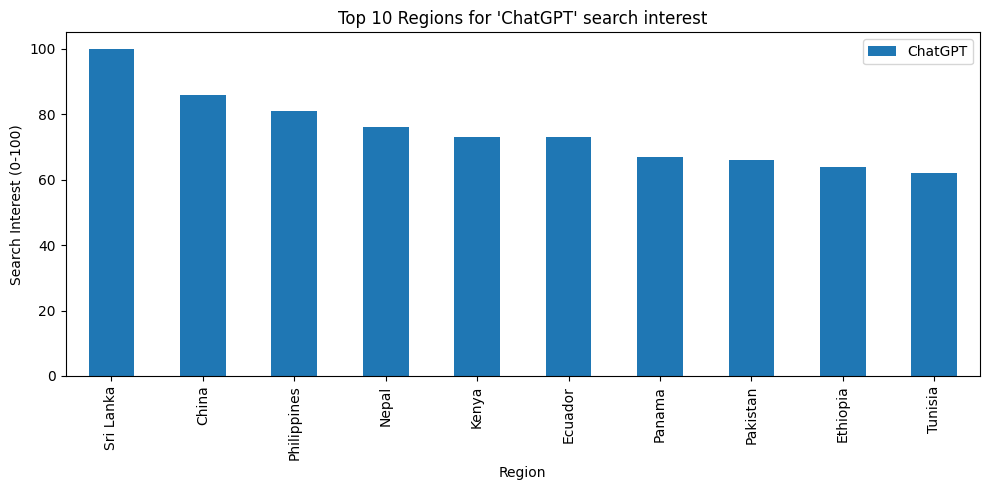

In [6]:

top_10_ibr_df.reset_index().plot(x="geoName",
                                 y=search_term,
                                 figsize=(10,5),
                                 kind="bar")
plt.title(f"Top 10 Regions for '{search_term}' search interest")
plt.xlabel("Region")
plt.ylabel("Search Interest (0-100)")
plt.tight_layout()
plt.show()

# Interpretation and Conclusion

Over the past 12 months, people’s interest in ChatGPT has increased slowly at first, and then more quickly from late 2024 to early 2025. The search interest was low during the middle of the year, but it started rising in September and reached the highest point in March 2025.

This shows that more and more people became curious about ChatGPT or started using it more often. The big rise in March might be because of a new feature launch, media attention, or growing popularity among students, workers, or developers.